![./Amoebe.jpg](./Amoebe.jpg)

Herzlich Willkommen in meiner Ausarbeitung zu Flächenschwerpunkten, spezieller: Die Berechnung der IAM Amoebe! 

Die hier behandelte Aufgabe wird jährlich vom IAM der RWTH Aachen University im Kurs Mechanik 1 gestellt und soll die Studierenden dazu motivieren kreative Lösungsansätze zu finden und Praxisnah Theorie zum Leben erwecken lassen. Finde ich im übrigen sehr lobenswert und wirklich spannend! 

Die Aufgabenstellung ist hierbei den Flächenschwerpunkt der sogenannten "Amoebe", einer komplexen Form, mittels eines Computer Programmes zu berechnen. Dabei soll das vorliegende Bild der Amoebe als Eingang genutzt werden und im Anschluss daran ein Programm entwickelt werden, dass uns den Relativen Flächenschwerpunkt dieser Fläche ausgibt (Visualisiert). Im besten Fall kann das Programm dies nicht nur für die Amoebe sondern auch für jedes beliebige Objekt (Auch ein sehr ratsames vorgehen, insbesondere in der Informatik). 

Da es als Belohnung für eine erfolgreiche Berechnung einen Apfel gibt strengen wir uns an, denn Studenten haben wenig Geld und `An Apple a Day, keeps the Doctor away`! 

Kurz den Spaß beiseite: Diese Ausarbeitung zielt **NICHT** darauf ab eine Lösung für euch darzustellen, die ihr ohne weiteres in der Vorlesung präsentieren und abstauben dürft, sondern dient natürlich Bildungszwecken!! Und natürlich obliegt es jedem selbst, jedoch für interessierte und leidenschaftliche Ingineure oder angehende Programmierer ist das hier vielleicht ein guter Einstieg Theoriewissen aus der Vorlesung und praktische Skills beim Programmieren aufzubauen oder auszubauen! Eine Gelegenheit, die man während des Studiums nicht in jedem Fach und jedem Semester bekommt!

Mein Apell ist demnach Klar und ich hoffe für die paar, die es wirklich interessiert, dass ich mit dieser Arbeit einen Anstoß geben kann.


**Was ist wichtig im Voraus - vorallem für Anfänger?**

Gut wären:

- Vorkenntnisse aus der Mechanik 1 Vorlesung (hier direkter Bezug vom IAM der RWTH)
- Basis bis gute Kenntnisse von Python3
- Logisches Denken
- Ausdauer (beim selbst erarbeiten benötigt man etwas Zeit, insbesondere als Einsteiger)

Ansonsten für Menschen die in keinem der Felder Erfahrungen bzw. Vorkenntnisse haben gibt es im Internet reichlich Informationen oder auch z.B. ChatGPT der einiges (insbesondere im Umgang mit Python) erzählen kann wenn man richtg fragt ;)

Damit gehts los ...


# Inhaltsverzeichnis

- [Theorie](#Theorie)
- [Vorgehensweise](#Vorgehensweise)
- [Implementieren](#Implementieren)
  - [Mechanische Funktionen](##Mechanische-Funktionen)
  - [Bildfunktionen](##Bildfunktionen)
    - [Pixel aus Bildern aufteilen](###Pixel-aus-Bildern-aufteilen)
    - [Visualisieren](###Visualisieren)
  - [Objekterkennung](##Objekterkennung)
- [Kombinieren](##Kombinieren)
- [Fazit](##Fazit)

## Zielsetzung der Arbeit

Das Ziel dieser Arbeit ist die Erstellung eines vollwertigen Tools zur automatischen Berechnung beliebiger Formen und im Übertragenen die Berechnung von Flächenschwerpunkten anhand eines (live) Kamerafeeds oder Fotos. Dazu werden wir hier Schritt für Schritt vorgehen.

>Kleine Anmerkung zu Beginn: Ich fertige diese Arbeit für persönliche Zwecke an und nicht im Auftrag einer Institution oder im Rahmen einer Arbeit! Es handelt sich >dabei um ein persönliches Projekt. Ich garantiere keine Genauigkeit oder Vollständigkeit. Kurz gesagt alle Angaben ohne Gewähr!  

# Theorie

Die Mechanik hinter der Berechnung ist zugegebener Maßen sogar ziemlich Einfach. In der Mechanik lernen wir wie der Schwerpunkt Massenbezogen berechnet wird. Dies Erfolgt gemäß der Formel:
$$
x_s = \frac{1}{m} \int_{B}^{} x \, dx
$$

Kurz erklärt bedeutet diese Formel, dass wir alle Ortsvektoren in X über den Körper aufintegrieren und dieses Integral durch die Masse teilen. Daraus erhalten wir die x-Koordinate des Schwerpunktes. Woher die Formel kommt, warum sie gilt (Beweis) und wie sie hergeleitet wird darauf möchte ich hier nicht eingehen. Wichtig ist für uns das Verständnis was die Gleichung aussagt.

An der Formel können wir bzw. müssen wir für unsere Zwecke ein paar Grundlegende Vereinfachungen treffen und die Formel weiter entwickeln. Wir wissen über unseren Körper, dass dessen Material vereinfacht homogen und dessen Dicke vereinfacht konstant bleibt. Wir wollen uns ja um ein 2 Dimensionales Objekt, also eine Fläche, kümmern. Dabei rückt die Betrachtung auf die reine Fläche, weshalb diese Formel daraus entsteht:

$$
x_{A1} = \frac{1}{A} \int_{S} x_1 \, da , \quad S_2 := \int_{S} x_1 \, da
$$

$$
x_{A2} = \frac{1}{A} \int_{S} x_2 \, da , \quad S_1 := \int_{S} x_2 \, da
$$

Die Formeln reichen für unsere Zwecke nur leider noch nicht aus. In diesem Stadium erkennen wir, dass der Flächenschwerpunkt über das Flächenintegral über die Fläche der infetisimal kleinen Flächenelemente integriert um dividiert mit der Gesamtfläche die Position in respektive x und y Richtung den Schwerpunkt zu berechnen. Problem hierbei: Computer rechnen in der Regel nicht algebraisch und vorallem stehen uns keine algebraischen Gleichungen für die Amoebe oder andere Objekte zur Verfügung. Aus diesem Grund nutzen wir die Diskretisierung um dieses Diskrete Problem numerisch zu lösen. Und keine Angst um das zu verstehen greife ich auf kein Wissen der Numerik zurück.

Nun schreiben wir die Formel um in: 

$$
x_{S} = \frac{\sum_{i} x_{Ai}*A_i}{\sum_{i} A_i} 
$$

Und das war auch schon die Magie des ganzen und der ein oder andere kann sich vielleicht jetzt schon denken, wie wir diese Aufgabe nun konkret lösen werden. 

Tatsächlich können wir aber selbst diese Gleichung noch vereinfachen. Ein Bild, aus dem wir die uns zur Verfügung gestellten Informationen beziehen, besteht aus Pixeln (diskrete Punkte). Sobald wir die Objekterkennung der Amoebe hinter uns haben, wissen wir welche Pixel (diskreten Punkte) zu unserer Fläche gehören und welche nicht. Darauf können wir nun unsere Formel anwenden ... Dafür müssen wir nur noch jedem Pixel, der der Amoebe zugehörig ist, das Gewicht 1 geben und die Gesamtfläche aufsummieren als die Anzahl an Pixeln der Fläche, die wir der Amoebe zuordnen können. Und viola wir haben eine noch deutlich einfachere Formel:

$$
x_s = \frac{\sum_{i} x_{Ai}}{z}, \quad z := \text{Anzahl der Pixel}
$$

$$
y_s = \frac{\sum_{i} y_{Ai}}{z}, \quad z := \text{Anzahl der Pixel}
$$

Und damit haben wir nun alles an theoretischer Grundlage für unsere Berechnung womit wir nun einen Schritt weiter gehen können und uns dem Programm widmen können.

# Vorgehensweise

Nun müssen wir unser großartiges Wissen von der Theorie in die Praxis bringen. Um uns die Entwicklung zu vereinfachen fangen wir damit an die Funktionen zum berechnen der mechanischen Funktionen zu bauen und diese an schwarz weiß Beispielbildern zu testen.

1. Mechanische Funktionen implementieren
2. Bildkonvertierung - Pixel als Massenpunkte
3. Objekterkennung
4. Kombinieren

# Implementieren

## Mechanische Funktionen

Als erstes bauen wir eine Klasse um die Formel zu implementieren. Warum eine Klasse?? Weils später einfacher ist weitere mechanische Funktionen an einem Ort zu lagern ;)

In [41]:
class Mechanic_Calc():
    name = "Mechanic Calculator"

    def __init__(self):
        pass

    # CG Calculator function
    def cg_calc_function(self, pixel_raster):
        # Go through Pixel List
        # Pixel must be a tuple of [x_pos, weight]
        # x_pos being the Position in either x or y
        # weight being 1 or 0 

        # Sum Values
        x_sum = 0
        y_sum = 0
        # Count all pixels with value -> 1
        count = 0

        # Position tracker
        x = 1
        y = 1
        
        for row in pixel_raster:
            for pixel in row:
                if pixel >= 1:
                    x_sum += x
                    y_sum += y
                    count += 1
                    
                # Increase X Position by 1
                x += 1
            
            # Reset X and move Y by 1
            x = 1
            y += 1

        # Now calculate the actual formula
        # Also checking if more than one pixel was available
        if count != 0:
            x_cg = x_sum / count
            y_cg = y_sum / count
        else:
            x_cg = 0
            y_cg = 0

        return x_cg, y_cg

Diese Klasse kann nun eine vorgefertigte Liste aus Pixeln (inkl. Weights) zu einem Schwerpunkt einer beliebigen Achse berechnen. Wie wir im Anschluss vorgehen werden und wie wir diese Klasse nutzen werden sehen Sie im Anchluss.

## Bildfunktionen

Wie vielleicht in der Klasse auffällt benötigt die Funktion eine Liste von Tupeln. Dabei muss immer eine Position und ein Gewicht (in unserem Fall ja immer 1 oder 0) angegeben werden. Dazu müssen wir ein Bild in all seine Pixel aufteilen und weißen Pixeln den Wert 0 und Schwarzen Pixeln den Wert 1 geben.

Um uns das Leben erstmal einfacher zu machen have ich in Inkscape, einem Grafikdesign Programm, händisch ein paar solcher Bild erstellt um die Entwicklung vorerst zu vereinfachen und nicht als erstes an Bildverarbeitung und Segmentierung hängen zu bleiben.

Die Liste an Verfügbaren Bildern enthält insbesondere Bilder von den Folgenden Formen:

- Viereck
- Rechteck
- Kreis
- Dreieck

Wer in Mechanik aufgepasst hat, der erkennt vielleicht einige dieser Formen wieder. Denn für die ersten Drei Formen ist der Flächenschwerpunkt **immer** in der Mitte der Fläche. Und auch beim Dreieck kennen wir den Flächenschwerpunkt genau, da wir wissen, dass dieser in jeder Raumrichtung immer 1/3 der Länge zum größten Winkel liegt. Diese Bilder bzw. Formen sind demnach extra so gewählt, dass wir unser Programm testen bzw. verifizieren können.

### Pixel aus Bildern aufteilen

Zuerst müssen wir Bilder überhaupt aufrufen können


In [63]:
from PIL import Image

def load_image_as_raster(image_path, debug=True):
    # Open the image
    img = Image.open(image_path).convert("1")  # Convert to binary (black and white)
    
    # Get image dimensions
    width, height = img.size

    if debug:
        print(f"Aufwand: {width}px * {height}px => {width*height}px")

    # Create Empty Array
    pixel_raster = []
    
    # Loop through each pixel position
    for y in range(height):

        pixel_line = []
        for x in range(width):
            # Get pixel value (0 for white, 1 for black)
            pixel_value = 1 if img.getpixel((x, y)) == 0 else 0
            # Store it in the dictionary with coordinates as the key
            pixel_line.append(pixel_value)

        pixel_raster.append(pixel_line)
    
    return pixel_raster

# Example usage
image_path = "./shapes/viereck_center.png"
raster = load_image_as_raster(image_path)

# Printing first 10 pixels as an example
print({k: raster[0][k] for k in range(10)})

Aufwand: 3000px * 3000px => 9000000px
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


Da wir nun ein Array mit allen Zeilen und den damit verbundenen Spalten als 1 und 0 Werte haben können wir mithilfe dieser Liste direkt unsere Klasse initialisieren und den Schwerpunkt unseres Vierecks ausprobieren. Zu erwarten ist, dass der Schwerpunkt demnach auch genau in der Mitte des Bildes, also bei 1500 x 1500 px liegt. 

Schauen wir nach ...

In [64]:
# Init Class
mc = Mechanic_Calc()

# Calculate CG
x_cg, y_cg = mc.cg_calc_function(raster)

# Print
print(f"CG: x -> {x_cg}px ; y -> {y_cg}px")

CG: x -> 1500.5px ; y -> 1500.5px


Tadaaaa ... Wir sehen es hat geklappt !!! Sehr cool, jetzt Visualisieren wir das am besten um für komplexere Formen einen Punkt im Bild markieren. Dazu nutzen wir die allseits bekannte Bibliothek mit dem Namen ComputerVision 2 oder CV2. Mit der Hilfe von Matplotlib funktioniert es dann auch wünschenswert in Jupyter ...

### Visualisieren

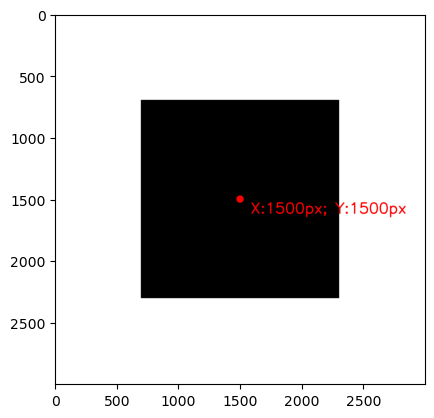

In [65]:
import cv2
import matplotlib.pyplot as plt

def display_cg_on_img(image_path, x_cg, y_cg, approx=False):
    # Load the image
    image = cv2.imread(image_path)
    
    # Draw a red circle at (100, 100) with radius 30
    cv2.circle(image, (int(x_cg), int(y_cg)), 30, (0, 0, 255), -1)  # Red circle with filled color

    if approx:
        cv2.circle(image, (int(x_cg), int(y_cg)), 250, (0, 255, 0), 6)
    
    # Some Info about CG
    # Font Setting
    font = cv2.FONT_HERSHEY_SIMPLEX  # Font type
    font_scale = 4  # Font size
    color = (0, 0, 255)  # Text color in BGR (red in this example)
    thickness = 10

    text_offset = 100
    cv2.putText(image, f"X:{int(x_cg)}px; Y:{int(y_cg)}px", (int(x_cg + text_offset - 15), int(y_cg + text_offset + 15)), font, font_scale, color, thickness)
    
    
    # Convert BGR (OpenCV format) to RGB (Matplotlib format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image using Matplotlib
    plt.imshow(image_rgb)
    plt.axis('on')
    plt.show()


# Display CG on IMG
display_cg_on_img(image_path, x_cg, y_cg)

Und hier können wir die Schönheit unserer Berechnung erkennen. Die Funktion zum Plotten können wir später noch weiter verwenden, jedoch werden wir im Anschluss zuerst die weiteren Shapes betrachten und dafür nochmal ein weiteren Code schnipsel bauen.

Unser Ziel ist es nun die 9 Shapes aus dem Ordner /shapes alle einzeln zu berechnen und in einem 3x3 Grid darzustellen. So können wir bereits Visuell anhand unserer Expertise überprüfen ob die Positionen logisch Sinn machen können ;)

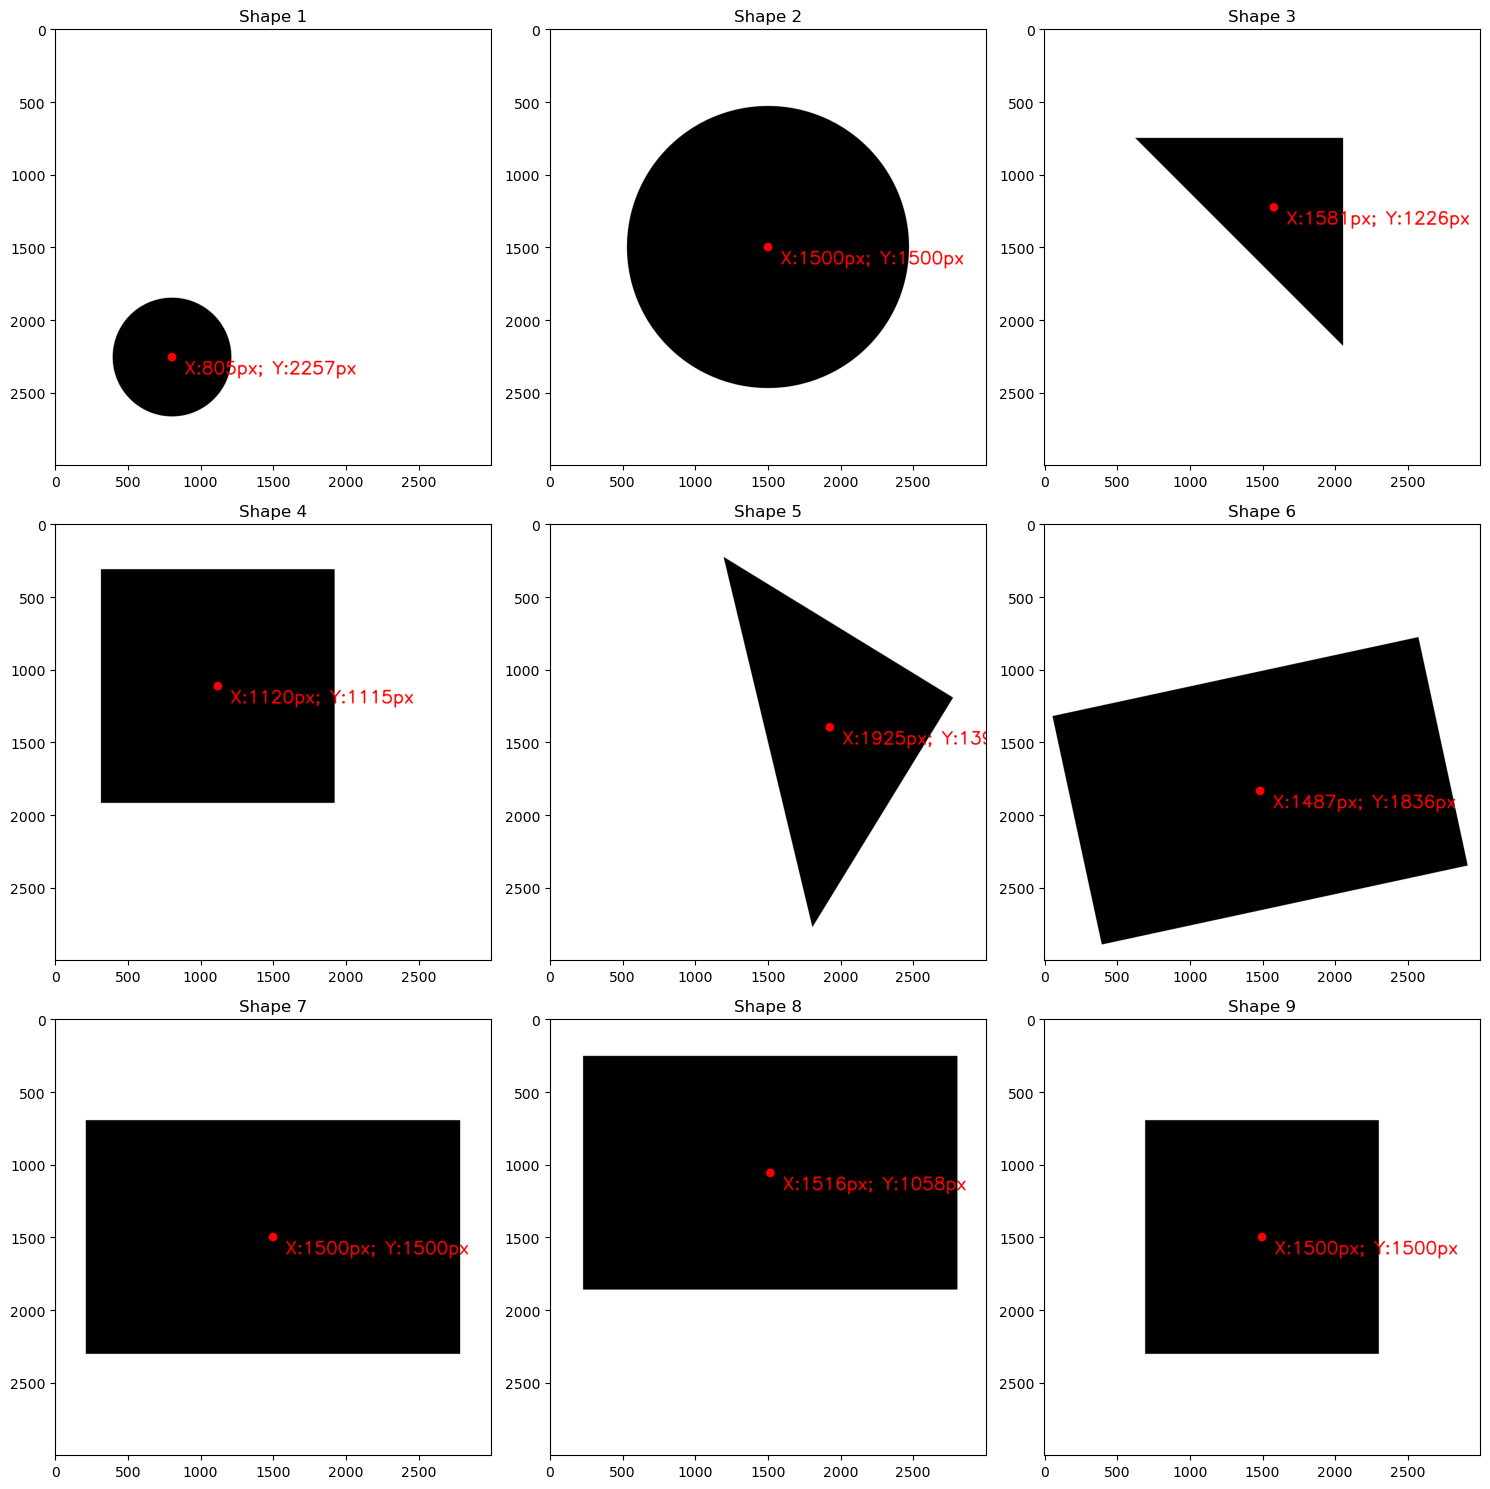

In [15]:
import os

# Dir Path
directory_path = "./shapes"

# Create List of paths
file_list = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 1 row, 3 columns
axes = axes.flatten()  # Flatten axes into a 1D array for easier indexing

c = 0

for image in file_list:
    if c >= len(axes):  # Avoid indexing error if more images than subplots
        break
    ####
    # Calculate Section
    
    # Get Image Raster
    new_raster = load_image_as_raster(f"{directory_path}/{image}", debug=False)

    # Calculate CG
    cg_x, cg_y = mc.cg_calc_function(new_raster)

    ####
    # Display Section
    
     # Load the image
    img = cv2.imread(f"{directory_path}/{image}")

    ## Shapes
    
    # Draw a red circle at CG
    cv2.circle(img, (int(cg_x), int(cg_y)), 30, (0, 0, 255), -1)  # Red circle with filled color
    
    # Some Info about CG
    # Font Setting
    font = cv2.FONT_HERSHEY_SIMPLEX  # Font type
    font_scale = 4  # Font size
    color = (0, 0, 255)  # Text color in BGR (red in this example)
    thickness = 10

    text_offset = 100
    cv2.putText(img, f"X:{int(cg_x)}px; Y:{int(cg_y)}px", (int(cg_x + text_offset - 15), int(cg_y + text_offset + 15)), font, font_scale, color, thickness)
    
    # Convert BGR (OpenCV format) to RGB (Matplotlib format)
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Plot each image
    axes[c].imshow(image_rgb)
    axes[c].axis('on')  # Show axes
    axes[c].set_title(f"Shape {c + 1}")

    # Increase Counter
    c += 1

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Wir können in dieser Ansammlung an Plots sehen, dass der Schwerpunkt 1. immer innerhalb der Shapes sind und 2. das die Positionierung des errechneten Schwerpunktes visuell betrachtet am richtigen Ort liegen sollte. Das ist ein sehr gutes Zeichen!!

## Objekterkennung

Willkommen im wahrscheinlich schwierigsten und aufwendigsten Teil dieser Ausarbeitung. Wir müssen es nun versuchen hinzubekommen die Amoebe (oder andere Objekte) vom Hintergrund abzuheben und dieses neue Segment als unsere Fläche zu betrachten. Die berechtigte Frage hierbei: Wie sollen wir das machen? Was nutzen wir dafür? KI? Gibt es Tools? Müssen wir kreativ werden?

Alle Antworten finden sich hier. Dieses Kapitel wird spannend und hier kann man bestimmt einiges lernen!

### 

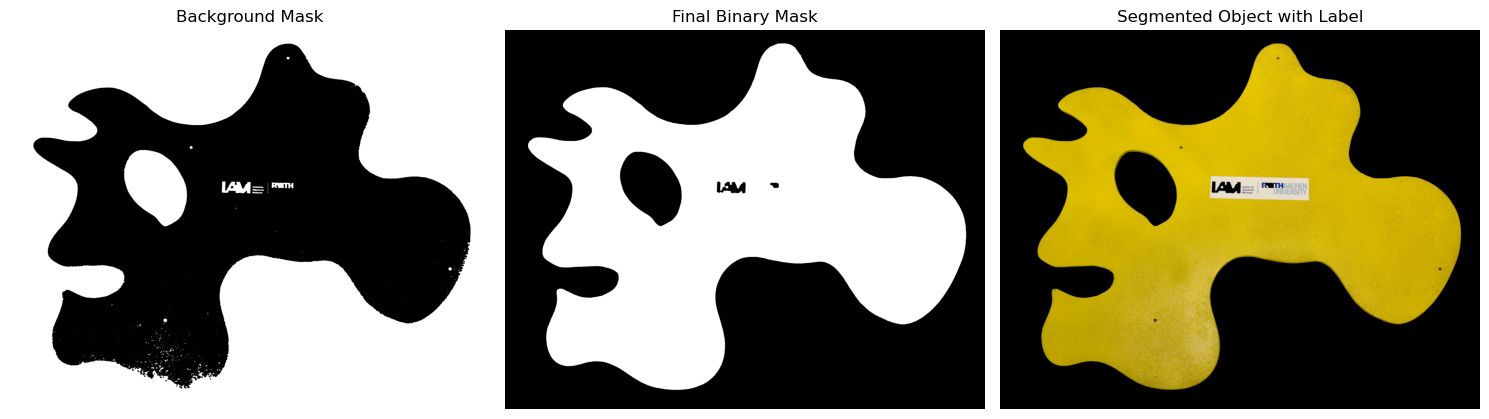

In [1]:
# Neuanfang - Skript von Anfang an

# Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_object(input_image_path, debug=True):
    # Image Path
    # Step 1: Load image and Copy original for later
    image = cv2.imread(input_image_path)
    original = image.copy()
    
    # Step 2: Background segmentation
    # Convert the image to LAB color space for better background isolation
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l_channel, a_channel, b_channel = cv2.split(lab_image)
    
    # Focus on the "L" (lightness) channel for distinguishing background
    _, background_mask = cv2.threshold(l_channel, 160, 255, cv2.THRESH_BINARY_INV)
    
    # Morphological operations to clean the background mask
    background_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    cleaned_background = cv2.morphologyEx(background_mask, cv2.MORPH_CLOSE, background_kernel, iterations=2)
    
    # Step 3: Combine with the yellow object mask (manually extract yellow regions)
    # Convert image to HSV for yellow mask
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
    
    # Morphological operations on the yellow mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    cleaned_yellow_mask = cv2.morphologyEx(yellow_mask, cv2.MORPH_CLOSE, kernel, iterations=3)
    
    # Invert the background mask to focus on the object + label
    object_and_label_mask = cv2.bitwise_not(cleaned_background)
    
    # Combine with the existing yellow object mask
    combined_mask = cv2.bitwise_or(cleaned_yellow_mask, object_and_label_mask)
    
    # Morphological closing to unify the object and label
    final_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel, iterations=3)
    
    # Convert the combined mask to black-and-white (binary)
    _, final_binary_result = cv2.threshold(final_mask, 127, 255, cv2.THRESH_BINARY)
    
    # Step 4: Convert binary mask to 0s and 1s
    binary_raster = (final_binary_result // 255).astype(np.uint8)
    
    # Step 5: Apply the mask to the original image
    segmented_with_label = cv2.bitwise_and(original, original, mask=final_binary_result)
    
    # Visualization of Segmentation
    if debug:
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        ax[0].imshow(cleaned_background, cmap='gray')
        ax[0].set_title("Background Mask")
        ax[0].axis("off")
        
        ax[1].imshow(binary_raster, cmap='gray')
        ax[1].set_title("Final Binary Mask")
        ax[1].axis("off")
        
        ax[2].imshow(cv2.cvtColor(segmented_with_label, cv2.COLOR_BGR2RGB))
        ax[2].set_title("Segmented Object with Label")
        ax[2].axis("off")
        
        plt.tight_layout()
        plt.show()

    return binary_raster


binary_raster = get_object("./Amoebe.jpg")

Ok einiges ist hier passiert das müssen wir ersteinmal Revu Passieren lassen. Das Ergebnis ist eindeutig, wir haben es geschafft nun einigermaßen den Vordergrund und Hintergrund (größtenteils) voneinander zu trennen und eine binary Mask zu erstellen.

Dabei nutzen wir eine Kombination unterschiedlicher Tools von CV2. Aber insbesondere kombinieren wir Color Maps und Hintergrund Segmentierung um Das Objekt möglichst gut zu trennen und erstellen dann eine sogenannte Binary Mask. Diese "Maske" aus einsen und nullen schafft dann wiederum unsere Berechnungsgrundlage um die mechanische Berechnung möglich zu machen!


## Kombinieren

Da wir es nun echt schnell geschafft haben die benötigte Binary Maske zu erstellen, die wir für unsere mechanische Klasse zur Berechnung brauchen können wir es nun auch direkt ausprobieren eine Berechnung durchzuführen.

CG: x -> 1603.2985590512312px ; y -> 1331.7013303806582px


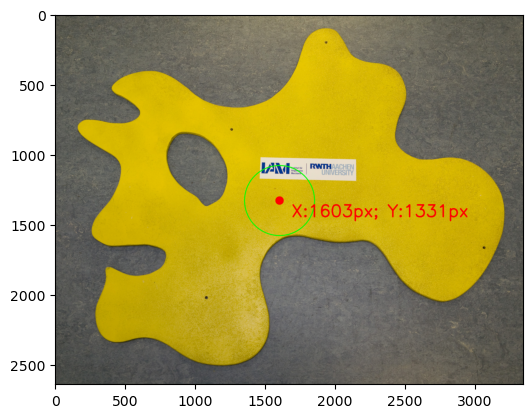

In [67]:
# Calculate CG
x_cg, y_cg = mc.cg_calc_function(binary_raster)

# Print
print(f"CG: x -> {x_cg}px ; y -> {y_cg}px")

# Display CG on IMG
display_cg_on_img("./Amoebe.jpg", x_cg, y_cg, True)

Und Voila ... Wir haben es geschafft !! Die Lösung ist gefunden.

Das ist wirklich ein Erfolg, da die tatsächliche Lösung eingezeichnet direkt darüber etwas schwach zu erkennen ist!! Damit ist die Abweichung dieser Methode, wie zu erwarten, sehr genau und in diesem Fall nur von der Objekterkennung abhängig. Der Grund für die Verschiebung des Schwerpunktes nach unten wird wohl durch die fälschliche Maske rund um den IAM Schriftzug zurstande kommen. 


# Fazit

Um ehrlich zu sein finde ich dieses Resultat sehr beeindruckend und cool diese Aufgabe programmativ erarbeitet und verifiziert zu haben. Eine wirklich schöne Aufgabe um Theorie und Praxis miteinander zu kombinieren. Durch diese Ausarbeitung hoffe ich ebenfalls Anfängern oder Interessierten eine Möglichkeit gegeben haben zu können in die Programmierung einzusteigen!

Anbei noch ein Extra Beispiel einer eigenen Amoebe ausgeschnitten aus einem PostIt. Der Prozess funktioniert also auch von anderen Fotos / anderen Kameras und ist somit nicht nur auf das konkrete IAM Amoebe Beispiel übertragbar. Zwar ist ein deutlich größeres Rauschen zu sehen, jedoch ist dies aus Erfahrung von Aufnahme zu Aufnahme anders.

Hier demnach ein kurzes Zusammenhängendes Skript mit allen Teilen, die wir in dieser Ausarbeitung erstellt haben:

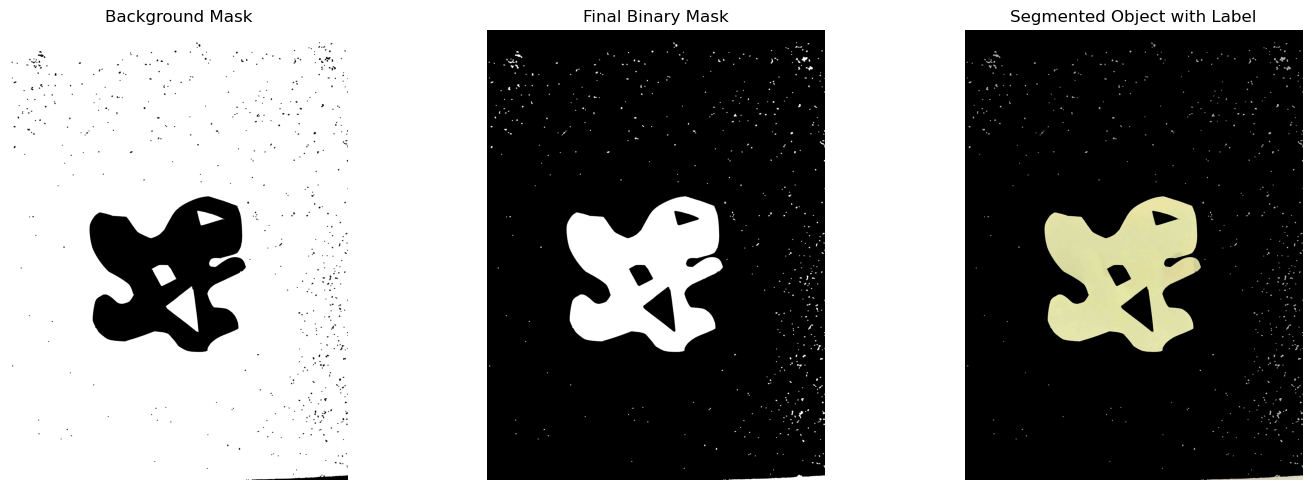

CG: x -> 1475.3156046774106px ; y -> 2171.717195549857px


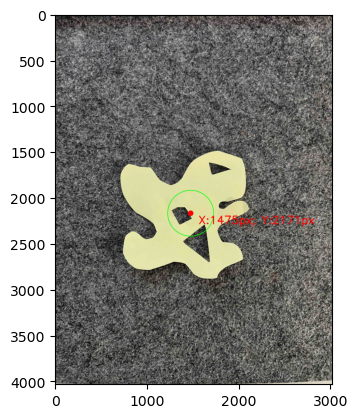

In [68]:
## 
# Test with other Images
binary_raster = get_object("./test2.jpg")

# Calculate CG
x_cg, y_cg = mc.cg_calc_function(binary_raster)

# Print
print(f"CG: x -> {x_cg}px ; y -> {y_cg}px")

# Display CG on IMG
display_cg_on_img("./test2.jpg", x_cg, y_cg, True)